In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns

In [3]:
hosp = pd.read_csv("./Hospital_Readmissions_Reduction_Program.csv")
hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 12 columns):
Hospital Name                 19674 non-null object
Provider ID                   19674 non-null int64
State                         19674 non-null object
Measure Name                  19674 non-null object
Number of Discharges          19674 non-null object
Footnote                      8157 non-null object
Excess Readmission Ratio      19674 non-null object
Predicted Readmission Rate    19674 non-null object
Expected Readmission Rate     19674 non-null object
Number of Readmissions        19674 non-null object
Start Date                    19674 non-null object
End Date                      19674 non-null object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


In [10]:
hosp.shape

(19674, 12)

In [21]:
hosp['Excess Readmission Ratio'] = pd.to_numeric(hosp['Excess Readmission Ratio'],errors='coerce')
hosp = hosp[pd.notnull(hosp['Excess Readmission Ratio'])]
hosp.shape

(14280, 12)

In [5]:
hosp2 = pd.read_csv("Hospital_General_Information.csv")
hosp2.shape

(4772, 29)

In [6]:
hosp2.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH BOAZ, AL 35957"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE FORT PAYNE, AL 35968"
2,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE HUNTSVILLE, AL 35801"
3,11304,CHOCTAW GENERAL HOSPITAL,"401 VANITY FAIR LANE, PO BOX 618",BUTLER,AL,36904,CHOCTAW,2054599100,Critical Access Hospitals,Voluntary non-profit - Private,...,Results are not available for this reporting p...,Not Available,There are too few measures or measure groups r...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"401 VANITY FAIR LANE, PO BOX 618 BUTLER, AL 36904"
4,21301,PROVIDENCE VALDEZ MEDICAL CENTER,PO BOX 550,VALDEZ,AK,99686,NaN,9078352249,Critical Access Hospitals,Government - Local,...,There are too few measures or measure groups r...,Not Available,There are too few measures or measure groups r...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,There are too few measures or measure groups r...,"PO BOX 550 VALDEZ, AK 99686"


In [7]:
hosp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 29 columns):
Provider ID                                                      4772 non-null int64
Hospital Name                                                    4772 non-null object
Address                                                          4772 non-null object
City                                                             4772 non-null object
State                                                            4772 non-null object
ZIP Code                                                         4772 non-null int64
County Name                                                      4761 non-null object
Phone Number                                                     4772 non-null int64
Hospital Type                                                    4772 non-null object
Hospital Ownership                                               4772 non-null object
Emergency Services                  

In [9]:
hosp2 = hosp2[["Provider ID","Hospital Ownership"]]
hosp2.shape

(4772, 2)

In [22]:
df = pd.merge(hosp, hosp2, on = "Provider ID", how = "inner")
df.shape

(14239, 13)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14239 entries, 0 to 14238
Data columns (total 13 columns):
Hospital Name                 14239 non-null object
Provider ID                   14239 non-null int64
State                         14239 non-null object
Measure Name                  14239 non-null object
Number of Discharges          14239 non-null object
Footnote                      2749 non-null object
Excess Readmission Ratio      14239 non-null float64
Predicted Readmission Rate    14239 non-null object
Expected Readmission Rate     14239 non-null object
Number of Readmissions        14239 non-null object
Start Date                    14239 non-null object
End Date                      14239 non-null object
Hospital Ownership            14239 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.5+ MB


In [32]:
df = df[["Hospital Ownership", "Excess Readmission Ratio"]]
df.head()

,Hospital Ownership,Excess Readmission Ratio
0,Proprietary,1.0195
1,Proprietary,1.0773
2,Proprietary,1.1031
3,Voluntary non-profit - Private,1.0024
4,Voluntary non-profit - Private,0.9726


In [41]:
grouped = df.groupby("Hospital Ownership").count()
grouped.shape

(10, 1)

In [44]:
grouped = grouped.rename({'Excess Readmission Ratio': 'Hospital Count'}, axis=1)  # new method
grouped.head(10)

,Hospital Count
Hospital Ownership,
Government - Federal,70
Government - Hospital District or Authority,1069
Government - Local,648
Government - State,187
Physician,111
Proprietary,2738
Tribal,9
Voluntary non-profit - Church,1321
Voluntary non-profit - Other,1425


In [35]:
grouped2 = df.groupby("Hospital Ownership").mean()
grouped2.shape

(10, 1)

In [45]:
new = pd.merge(grouped, grouped2, on = "Hospital Ownership")
new.shape

(10, 2)

In [46]:
new.head(10)

,Hospital Count,Excess Readmission Ratio
Hospital Ownership,,
Government - Federal,70,1.010659
Government - Hospital District or Authority,1069,1.000143
Government - Local,648,1.000687
Government - State,187,1.007719
Physician,111,0.967171
Proprietary,2738,1.022753
Tribal,9,0.970789
Voluntary non-profit - Church,1321,0.992996
Voluntary non-profit - Other,1425,0.994835


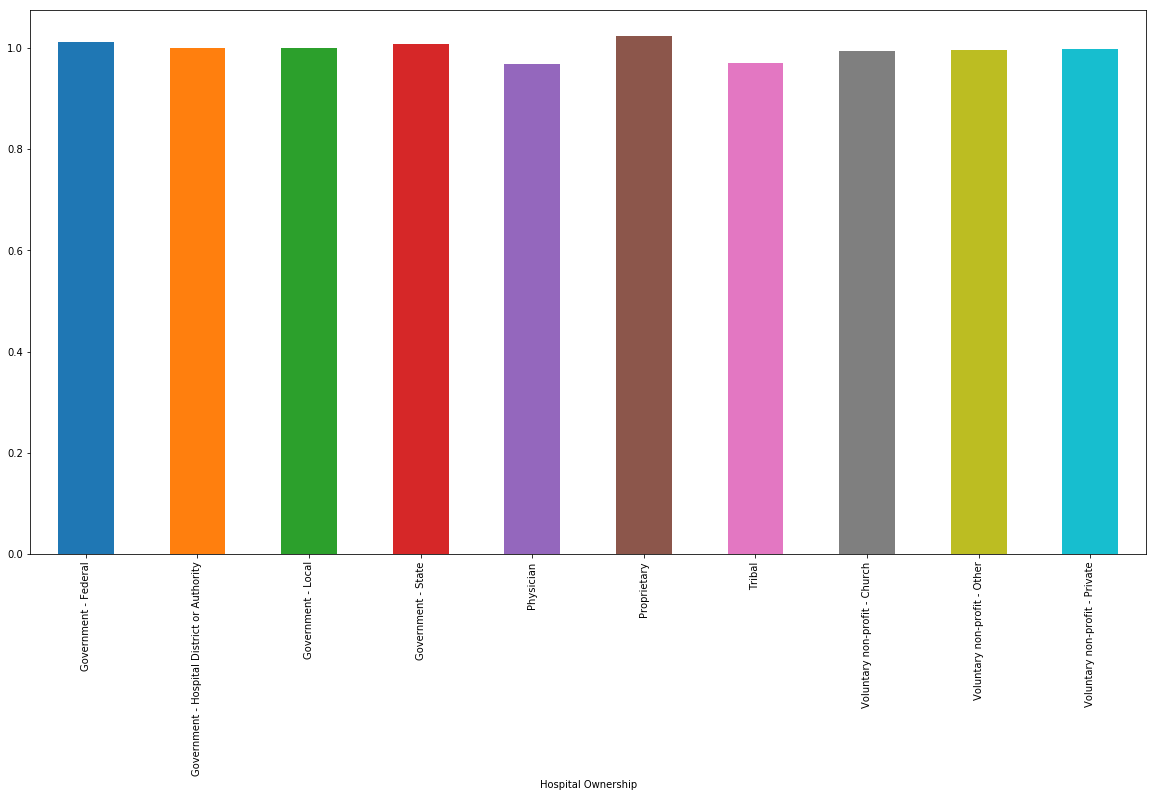

In [47]:
new["Excess Readmission Ratio"].plot(kind="bar", figsize=(20,10))

In [11]:
grouped = hosp2.groupby("State")
grouped.head()

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,07/01/2014,06/30/2017
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259,NaN,1.0773,23.9788,22.2578,67,07/01/2014,06/30/2017
5,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_PN_HRRP,213,NaN,1.1031,19.2445,17.4459,47,07/01/2014,06/30/2017
8,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_COPD_HRRP,Not Available,5 - Results are not available for this reporti...,1.0024,18.0061,17.9630,Not Available,07/01/2014,06/30/2017
9,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_HF_HRRP,75,NaN,0.9726,19.6816,20.2355,13,07/01/2014,06/30/2017
10,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_HIP_KNEE_HRRP,Not Available,5 - Results are not available for this reporti...,0.9761,4.4642,4.5734,Not Available,07/01/2014,06/30/2017
11,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_PN_HRRP,153,NaN,0.9719,14.1502,14.5594,20,07/01/2014,06/30/2017
18,CHESHIRE MEDICAL CENTER,300019,NH,READM_30_AMI_HRRP,Not Available,5 - Results are not available for this reporti...,1.0101,19.0025,18.8128,Not Available,07/01/2014,06/30/2017
20,CHESHIRE MEDICAL CENTER,300019,NH,READM_30_COPD_HRRP,196,NaN,0.9820,18.5452,18.8845,35,07/01/2014,06/30/2017
21,CHESHIRE MEDICAL CENTER,300019,NH,READM_30_HF_HRRP,303,NaN,0.9514,19.8545,20.8696,57,07/01/2014,06/30/2017


In [12]:
#hosp2.plot(kind="bar", x='State',y='Excess Readmission Ratio',  figsize=(20,10))

In [15]:
hosp3 = hosp2[["State", "Excess Readmission Ratio"]]
hosp3.head()

,State,Excess Readmission Ratio
2,LA,1.0195
3,LA,1.0773
5,LA,1.1031
8,MN,1.0024
9,MN,0.9726


In [17]:
hosp4 = hosp3.groupby('State').mean()
hosp4.head()

,Excess Readmission Ratio
State,
AK,0.956058
AL,1.018150
AR,1.023103
AZ,0.983623
CA,1.003880


In [20]:
hosp4.to_csv("AverageReadmissionRatioByState.csv")

In [21]:
hosp4.shape

(51, 1)

In [22]:
hosp4.describe()

,Excess Readmission Ratio
count,51.000000
mean,0.991212
std,0.029532
min,0.919639
25%,0.967446
50%,0.997538
75%,1.010593
max,1.037059


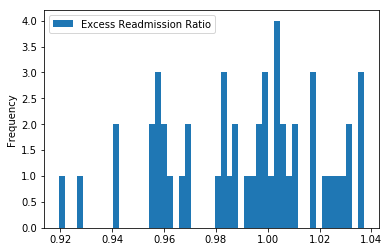

In [24]:
hosp4.plot(kind="hist", bins=51)